(360, 640, 3)
(288, 513, 3)


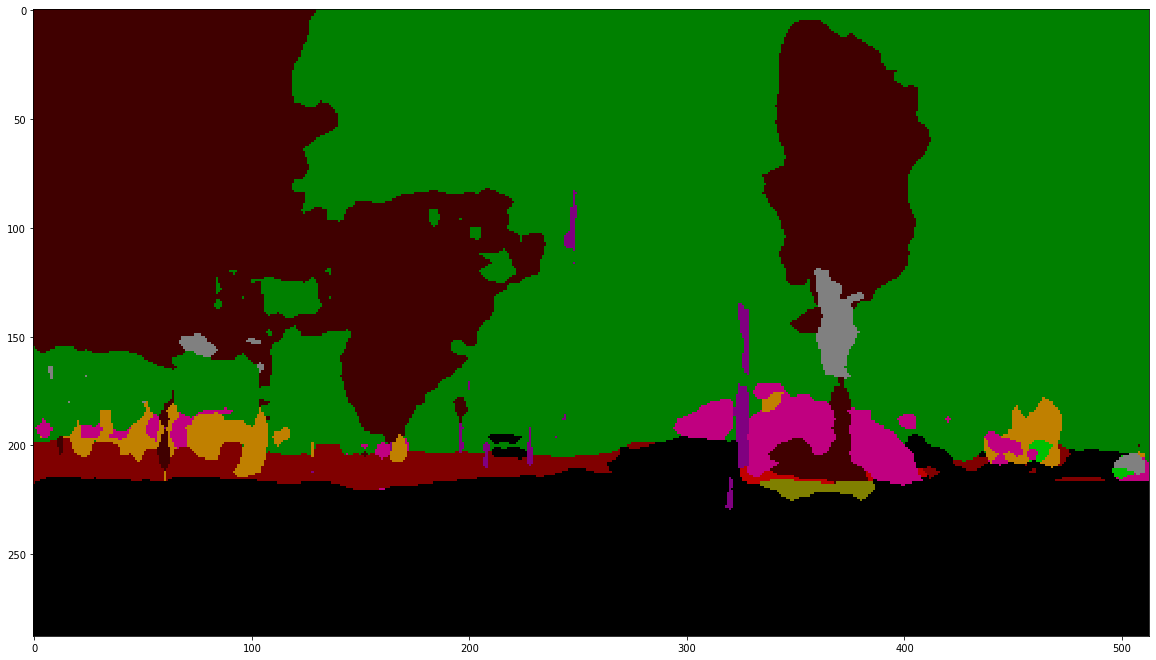

In [28]:
import requests, json, cv2
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

#URL = 'http://143.248.94.189:35005/api/predict'
URL = 'http://143.248.96.81:35005/api/predict'

#img_path = './data/ki_office/3.png'
img_path = './data/ki_outdoor/2.png'
im1 = cv2.imread(img_path)

rNum = 360
cNum = 640

if im1.shape != [rNum,cNum]:
    im1 = cv2.resize(im1, (cNum, rNum))

im1=cv2.cvtColor(im1, cv2.COLOR_RGB2BGR)
print(im1.shape)


strImgTest = '['
for r in range(rNum):
    strImgTest+='['
    for c in range(cNum):
        strTmp = '['+str((im1[r][c][0]))+','+str((im1[r][c][1]))+','+str((im1[r][c][2]))+']'
        strImgTest+=strTmp

        if c !=cNum-1 :
            strImgTest+=','
    strImgTest+=']'
    if r != rNum-1:
        strImgTest += ','
strImgTest+=']'

#plt.figure(figsize=(20, 15))
#plt.imshow(img)
#plt.show()

res = requests.post(url=URL, data={'image':strImgTest})

param = json.loads(res.text)
seg_res = param['seg_img']
seg_array = np.array(seg_res, dtype=np.uint8)
print(seg_array.shape)
seg_img = Image.fromarray(seg_array)
plt.figure(figsize=(20, 15))
plt.imshow(seg_img)